# Ampute testing 

In [13]:
import numpy as np
import pandas as pd
import pyampute
from pyampute.ampute import MultivariateAmputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge
import os
import matplotlib.pyplot as plt
from sklearn import linear_model

## Data generation 

In [14]:
def data_gener(n, ro):
    #continious data
#     mu = np.array([5, 5, 10])
#     mu = np.array([1, 10, 100]) 
    mu = np.array([1, 100, 10000])
    Sigma = np.array([[1, ro, ro], [ro, 1, ro], [ro, ro, 1]])
    X_cont = np.random.multivariate_normal(mu, Sigma, size = n)

    return X_cont

In [3]:
#pd.DataFrame(data_gener(1000, cor), columns = ['Y1','Y2','X1'])

### the role of the data MU 

In [4]:
propor = 0.2
corrs = np.arange(0.1, 1, 0.1)

df_bias_cc = pd.DataFrame(columns = ['full', 'MAR1', 'MAR2', 'MAR3', 'MAR4'])

for cor in corrs:
    
    n = 0
    df_means = pd.DataFrame(columns = ['mean_full', 'mean_MAR1', 'mean_MAR2', 'mean_MAR3', 'mean_MAR4'])

    for n in np.arange(100):

        X_full = data_gener(1000, cor)
        df_means.loc[n, 'mean_full'] = X_full[:,0].mean() 

        
        #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]
        
        ma = MultivariateAmputation(
            patterns = [ {'incomplete_vars': [0,1], 'weights': [0,0,1], 'mechanism': "MAR"} ],
            prop = propor
        )
        X_miss = ma.fit_transform(X_full)
        
        X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
        cc = X_m.dropna()
        df_means.loc[n, 'mean_MAR1'] = cc['Y1'].mean() 


        #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]
        
        ma = MultivariateAmputation(
            patterns = [ {'incomplete_vars': [0], 'weights': [0,1,1], 'mechanism': "MAR"} ],
            prop = propor
        )
        X_miss = ma.fit_transform(X_full)
        
        X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
        cc = X_m.dropna()
        df_means.loc[n, 'mean_MAR2'] = cc['Y1'].mean() 

        
        
        #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]
        
        ma = MultivariateAmputation(
            patterns = [ {'incomplete_vars': [1,2], 'weights': [1,0,0], 'mechanism': "MAR"} ],
            prop = propor
        )
        X_miss = ma.fit_transform(X_full)
        
        X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
        cc = X_m.dropna()
        df_means.loc[n, 'mean_MAR3'] = cc['Y1'].mean() 
        
        
        #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]
        
        ma = MultivariateAmputation(
            patterns = [ {'incomplete_vars': [2], 'weights': [1,1,0], 'mechanism': "MAR"} ],
            prop = propor
        )
        X_miss = ma.fit_transform(X_full)
        
        X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
        cc = X_m.dropna()
        df_means.loc[n, 'mean_MAR4'] = cc['Y1'].mean() 

        
    df_bias_cc.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
    df_bias_cc.loc[cor, 'MAR1'] = df_means['mean_MAR1'].mean() - df_means['mean_full'].mean()
    df_bias_cc.loc[cor, 'MAR2'] = df_means['mean_MAR2'].mean() - df_means['mean_full'].mean()
    df_bias_cc.loc[cor, 'MAR3'] = df_means['mean_MAR3'].mean() - df_means['mean_full'].mean()
    df_bias_cc.loc[cor, 'MAR4'] = df_means['mean_MAR4'].mean() - df_means['mean_full'].mean()

    
df_bias_cc

,full,MAR1,MAR2,MAR3,MAR4
0.1,0.0,-0.01566,-0.022682,-0.172237,-0.128554
0.2,0.0,-0.033114,-0.044715,-0.169654,-0.133391
0.3,0.0,-0.054176,-0.063419,-0.171452,-0.139228
0.4,0.0,-0.071809,-0.083266,-0.17529,-0.145701
0.5,0.0,-0.085162,-0.100331,-0.172628,-0.149612
0.6,0.0,-0.106679,-0.114711,-0.174559,-0.158558
0.7,0.0,-0.12224,-0.131752,-0.174182,-0.160837
0.8,0.0,-0.138097,-0.144826,-0.173595,-0.164284
0.9,0.0,-0.156765,-0.163053,-0.174861,-0.170297


MU по итогу не влияет на bias

mu = np.array([1, 100, 10000])

<AxesSubplot:>

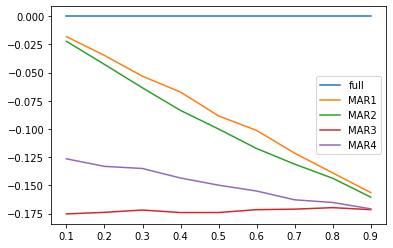

In [9]:
df_bias_cc.plot()

mu = np.array([1, 10, 100]) 

<AxesSubplot:>

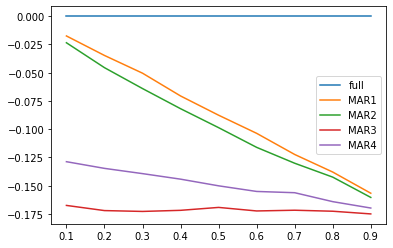

In [17]:
df_bias_cc.plot()

## Function AMPUTE by ANY param and mech with definite patterns

In [17]:
# mech = "MAR"
# mech+ str(2)

### Chart interpretation MAR vs MNAR

#### CC affecting all variables

старые же графики в этом блоке построены при подсчете среднего после CC у всех переменных

In [15]:
tmp_MAR_Y1 = M_ampute(param = "Y1", num = 0, propor = 0.2, mech = "MAR")
tmp_MAR_Y2 = M_ampute(param = "Y2", num = 1, propor = 0.2, mech = "MAR")
tmp_MAR_X1 = M_ampute(param = "X1", num = 2, propor = 0.2, mech = "MAR")
tmp_MNAR_Y1 = M_ampute(param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
tmp_MNAR_Y2 = M_ampute(param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
tmp_MNAR_X1 = M_ampute(param = "X1", num = 2, propor = 0.2, mech = "MNAR")

NameError: name 'M_ampute' is not defined

NameError: name 'tmp_MAR_Y1' is not defined

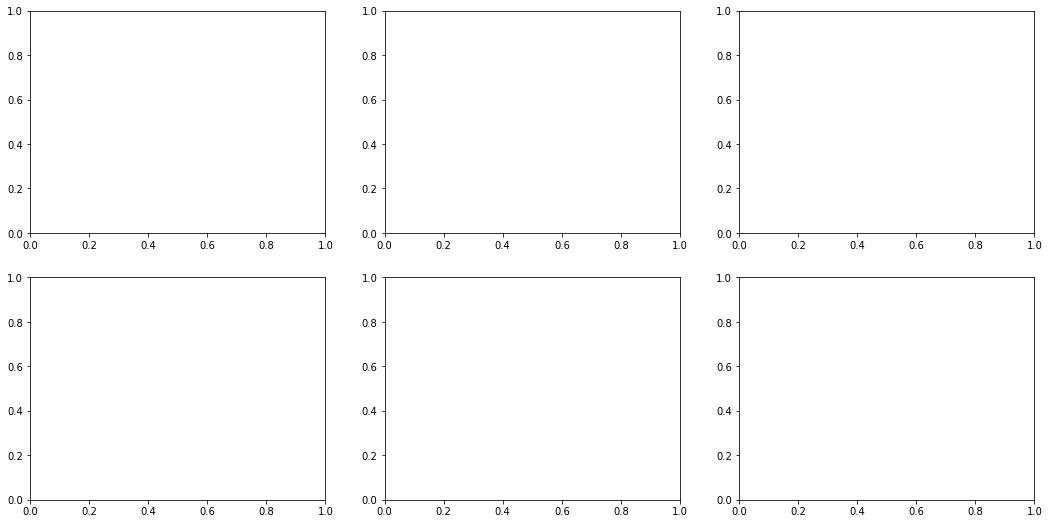

In [11]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))

tmp_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
tmp_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
tmp_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
tmp_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
tmp_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
tmp_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

Расшифровка графиков:

График (1.1):
У нижней кривой MAR3 pattern = [1 0 0] => Вклад в потерю данных во 2 и 3 столбцах вносит только Y1. Получаем для всех строк WSS_i = y1_i. Далее выкидывается доля = prop строк с бОльшими wss. Таким образом, при анализе bias при подсчете среднего по Y1 после ампутаций в столбце Y1 потеряются самые большие значения, а значит среднее уменьшится. Так же оно будет ~постоянным не зависимо от cor.

Следующая кривая MAR4 находится чуть выше MAR3, поскольку вклад в wss дает еще и параметр Y2. С ростом cor bias увеличивается, поскольку данные становятся сильносвязанными, а значит при большем Y1 будет большее значение Y2 => будут выкидываться большие значения, и опять среднее будет сильнее отличаться от исходного. 

У кривых MAR1, MAR2 та же ситуация. В этих паттернах потеря не зависит от Y1. Получается, при малых cor с точки зрения Y1 значения теряются в общем то случайно (так как строки выбиваются с бОльшим wss, вклад в который дают Y2, X1), однако при увеличении cor начинают выбиваться и бОльшие значения Y1, поэтому bias и увеличивается.


График (1.2) by Y2:
Паттерна 0 1 0 среди приведенных выше нет, поэтому и нет горизонтальной кривой, как MAR3 на гр.(1). 
MAR2, MAR4 - аналог MAR4 на гр.(1).

MNAR - это те же графики MAR, только при других паттернах. Например, MNAR2 = MAR3, поскольку в wss у MAR3 (1 0 0) вклад вносит только Y1, то же самое происходит при MNAR2 (0 1 1). То есть на потерю необходимых значений влияет только стоблец Y1.

Аналогичным образом MNAR1 = MAR4, MNAR3 = MAR2, MNAR4 = MAR1.

#### Mean by column without CC

In [16]:
def mean_withoutCC(param, num, propor, mech):

    corrs = np.arange(0.1, 1, 0.1)

    df_bias = pd.DataFrame(columns = ['full', mech+str(1), mech+str(2), mech+str(3), mech+str(4)])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_M1', 'mean_M2', 'mean_M3', 'mean_M4'])

        for n in np.arange(100):

            X_full = data_gener(1000, cor)
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean() 


            #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0,1], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            
            df_means.loc[n, 'mean_M1'] = X_m[param].mean(axis = 0, skipna = True)



            
            #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            
            df_means.loc[n, 'mean_M2'] = X_m[param].mean(axis = 0, skipna = True)




            #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [1,2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            
            df_means.loc[n, 'mean_M3'] = X_m[param].mean(axis = 0, skipna = True)



            
            #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            
            df_means.loc[n, 'mean_M4'] = X_m[param].mean(axis = 0, skipna = True)


        df_bias.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias.loc[cor, mech+str(1)] = df_means['mean_M1'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(2)] = df_means['mean_M2'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(3)] = df_means['mean_M3'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(4)] = df_means['mean_M4'].mean() - df_means['mean_full'].mean()

    return df_bias

In [17]:
meanNA_MAR_Y1 = mean_withoutCC(param = "Y1", num = 0, propor = 0.2, mech = "MAR")
meanNA_MAR_Y2 = mean_withoutCC(param = "Y2", num = 1, propor = 0.2, mech = "MAR")
meanNA_MAR_X1 = mean_withoutCC(param = "X1", num = 2, propor = 0.2, mech = "MAR")
meanNA_MNAR_Y1 = mean_withoutCC(param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
meanNA_MNAR_Y2 = mean_withoutCC(param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
meanNA_MNAR_X1 = mean_withoutCC(param = "X1", num = 2, propor = 0.2, mech = "MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

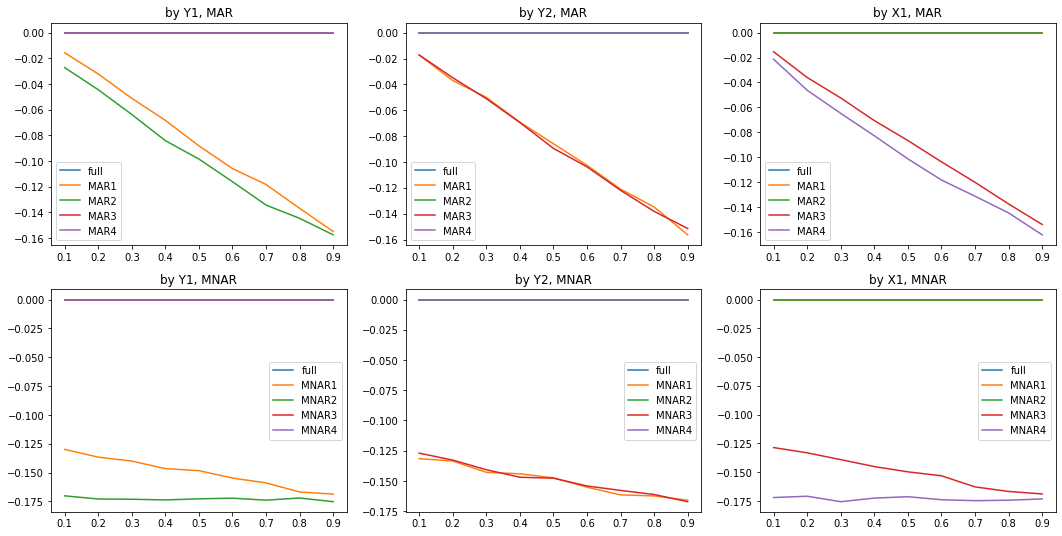

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))

meanNA_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
meanNA_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
meanNA_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
meanNA_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
meanNA_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
meanNA_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

### Сomparison prop = 0.2 and prop = 0.4

In [21]:
tmp2_MAR_Y1 = MAR_ampute(param = "Y1", num = 0, propor = 0.4, mech = "MAR")
tmp2_MAR_Y2 = MAR_ampute(param = "Y2", num = 1, propor = 0.4, mech = "MAR")
tmp2_MAR_X1 = MAR_ampute(param = "X1", num = 2, propor = 0.4, mech = "MAR")

<AxesSubplot:title={'center':'by X1, MAR, prop = 0.4'}>

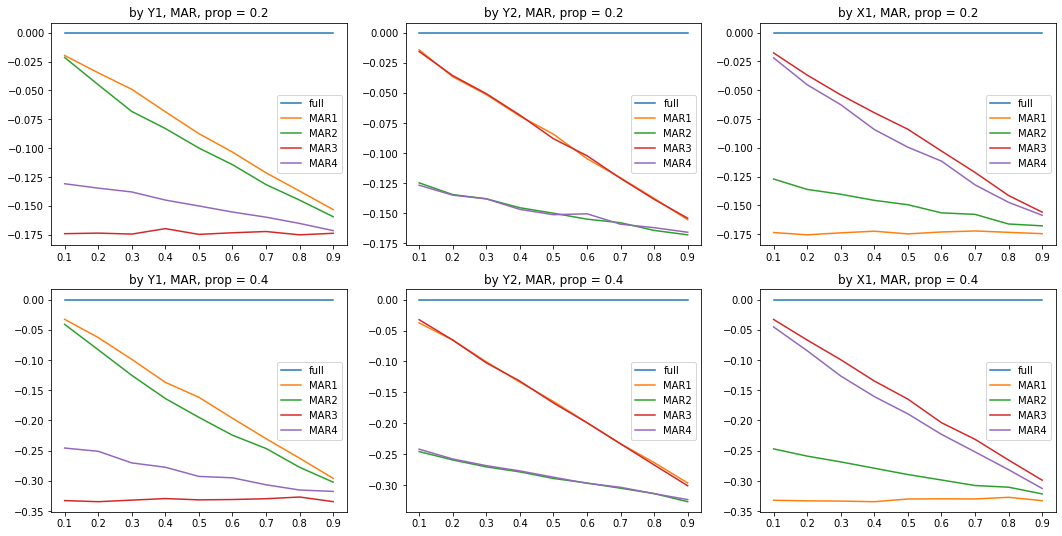

In [23]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6 * 3,3 * 3))
#fig.tight_layout()

tmp_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR, prop = 0.2")
tmp2_MAR_Y1.plot(ax = axes[1,0], title = "by Y1, MAR, prop = 0.4")
tmp_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR, prop = 0.2")
tmp2_MAR_Y2.plot(ax = axes[1,1], title = "by Y2, MAR, prop = 0.4")
tmp_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR, prop = 0.2")
tmp2_MAR_X1.plot(ax = axes[1,2], title = "by X1, MAR, prop = 0.4")

При увеличении prop графики сохраняют вид, меняется только размах bias

## All patterns by MAR

In [31]:
def MAR_ampute_byAll(propor, varss, weights):

    corrs = np.arange(0.1, 1, 0.1)
    df_bias = pd.DataFrame(columns = ['byY1', 'byY2', 'byX1'])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_fullY1', 'mean_byY1', 'mean_fullY2', 'mean_byY2', 'mean_fullX1', 'mean_byX1'])

        for n in np.arange(100):

            X_full = data_gener(1000, cor) 

            
            df_means.loc[n, 'mean_fullY1'] = X_full[:,0].mean()
            df_means.loc[n, 'mean_fullY2'] = X_full[:,1].mean()
            df_means.loc[n, 'mean_fullX1'] = X_full[:,2].mean()
        
            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': varss, 'weights': weights, 'mechanism': "MAR"} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            cc = X_m.dropna()
            
            df_means.loc[n, 'mean_byY1'] = cc['Y1'].mean()
            df_means.loc[n, 'mean_byY2'] = cc['Y2'].mean() 
            df_means.loc[n, 'mean_byX1'] = cc['X1'].mean() 

            
 
        df_bias.loc[cor, 'byY1'] = df_means['mean_byY1'].mean() - df_means['mean_fullY1'].mean()
        df_bias.loc[cor, 'byY2'] = df_means['mean_byY2'].mean() - df_means['mean_fullY2'].mean()
        df_bias.loc[cor, 'byX1'] = df_means['mean_byX1'].mean() - df_means['mean_fullX1'].mean()

    return df_bias

With default weights: (later we can play with other weights)

with prop = 0.2

In [32]:
MAR_ampute_001_02 = MAR_ampute_byAll(propor = 0.2, varss = [0,1], weights = [0,0,1])
MAR_ampute_010_02 = MAR_ampute_byAll(propor = 0.2, varss = [0,2], weights = [0,1,0])
MAR_ampute_100_02 = MAR_ampute_byAll(propor = 0.2, varss = [1,2], weights = [1,0,0])
MAR_ampute_011_02 = MAR_ampute_byAll(propor = 0.2, varss = [0], weights = [0,1,1])
MAR_ampute_101_02 = MAR_ampute_byAll(propor = 0.2, varss = [1], weights = [1,0,1])
MAR_ampute_110_02 = MAR_ampute_byAll(propor = 0.2, varss = [2], weights = [1,1,0])

<AxesSubplot:title={'center':'1 1 0, prop = 0.2'}>

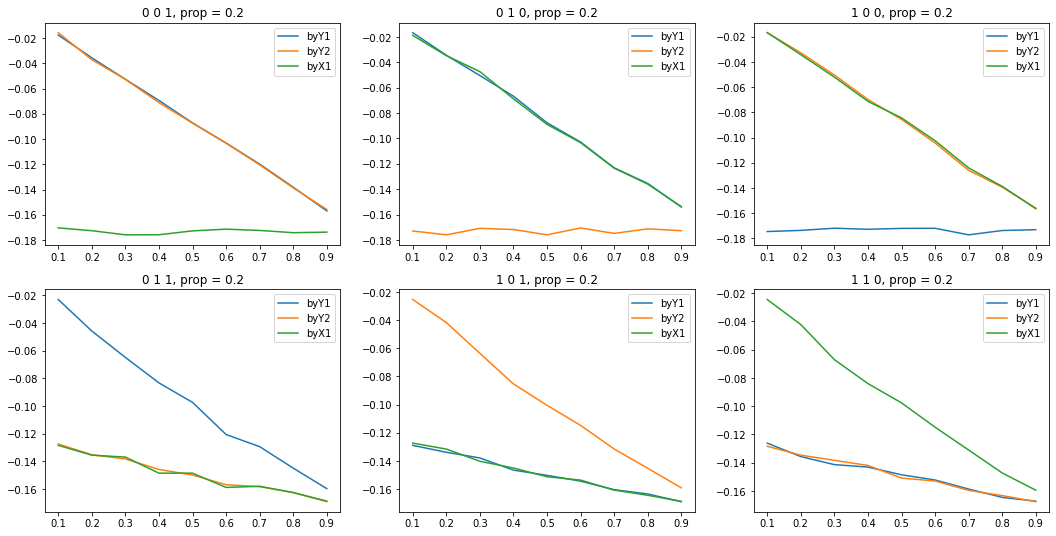

In [35]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6 * 3,3 * 3))

MAR_ampute_001_02.plot(ax = axes[0,0], title = "0 0 1, prop = 0.2")
MAR_ampute_010_02.plot(ax = axes[0,1], title = "0 1 0, prop = 0.2")
MAR_ampute_100_02.plot(ax = axes[0,2], title = "1 0 0, prop = 0.2")
MAR_ampute_011_02.plot(ax = axes[1,0], title = "0 1 1, prop = 0.2")
MAR_ampute_101_02.plot(ax = axes[1,1], title = "1 0 1, prop = 0.2")
MAR_ampute_110_02.plot(ax = axes[1,2], title = "1 1 0, prop = 0.2")

## Few patterns for one ampute

In [5]:
def ampute_fewPatterns(propor, pattern):

    corrs = np.arange(0.1, 1, 0.1)
    df_bias = pd.DataFrame(columns = ['byY1', 'byY2', 'byX1'])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_fullY1', 'mean_byY1', 'mean_fullY2', 'mean_byY2', 'mean_fullX1', 'mean_byX1'])

        for n in np.arange(100):

            X_full = data_gener(1000, cor) 
            
            df_means.loc[n, 'mean_fullY1'] = X_full[:,0].mean()
            df_means.loc[n, 'mean_fullY2'] = X_full[:,1].mean()
            df_means.loc[n, 'mean_fullX1'] = X_full[:,2].mean()
        
            ma = MultivariateAmputation(
                patterns = pattern,
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            cc = X_m.dropna()
            
            df_means.loc[n, 'mean_byY1'] = cc['Y1'].mean()
            df_means.loc[n, 'mean_byY2'] = cc['Y2'].mean() 
            df_means.loc[n, 'mean_byX1'] = cc['X1'].mean() 

            
 
        df_bias.loc[cor, 'byY1'] = df_means['mean_byY1'].mean() - df_means['mean_fullY1'].mean()
        df_bias.loc[cor, 'byY2'] = df_means['mean_byY2'].mean() - df_means['mean_fullY2'].mean()
        df_bias.loc[cor, 'byX1'] = df_means['mean_byX1'].mean() - df_means['mean_fullX1'].mean()

    return df_bias

In [9]:
MAR11_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"}])

MAR12_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"}])

MAR13_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [1,2], 'mechanism': "MAR"}])

MAR14_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [2], 'mechanism': "MAR"}])

MAR21_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MAR"}])

MAR22_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [1,2], 'mechanism': "MAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

MAR31_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MAR"}])

MAR4_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

MNAR4_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MNAR"},
                    {'incomplete_vars': [0], 'mechanism': "MNAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MNAR"},
                    {'incomplete_vars': [2], 'mechanism': "MNAR"}])

### pattern's combination of MAR, MNAR part 1

у непропущенных параметров считать среднее по всем данным

<AxesSubplot:title={'center':'MNAR1+MNAR2+MNAR3+MNAR4'}>

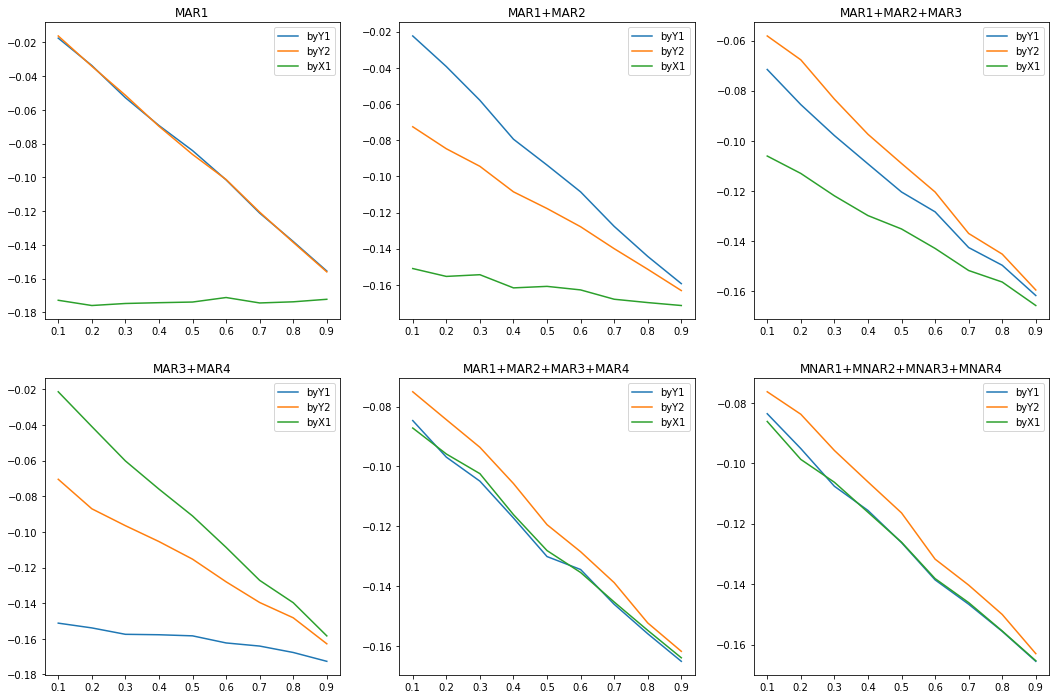

In [98]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6 * 3,4 * 3))


MAR11_fewPatterns.plot(ax = axes[0,0], title = "MAR1")
MAR21_fewPatterns.plot(ax = axes[0,1], title = "MAR1+MAR2")
MAR31_fewPatterns.plot(ax = axes[0,2], title = "MAR1+MAR2+MAR3")

MAR22_fewPatterns.plot(ax = axes[1,0], title = "MAR3+MAR4")
MAR4_fewPatterns.plot(ax = axes[1,1], title = "MAR1+MAR2+MAR3+MAR4")
MNAR4_fewPatterns.plot(ax = axes[1,2], title = "MNAR1+MNAR2+MNAR3+MNAR4")

# MAR11_fewPatterns.plot(ax = axes[0,0])
# MAR12_fewPatterns.plot(ax = axes[0,0])
# MAR13_fewPatterns.plot(ax = axes[0,0])
# MAR14_fewPatterns.plot(ax = axes[0,0], title = "MAR1, MAR2, MAR3, MAR4")

график MAR1+MAR2+MAR3+MAR4 идентичен графику MNAR1+MNAR2+MNAR3+MNAR4, поскольку паттерны в wss абсолютно одинаковые (однако при разных freq ситуация будет разная)

### pattern's combination of MAR, MNAR part 2

In [13]:
MAR_MNAR1_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MNAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MNAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

MAR_MNAR2_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MNAR"},
                    {'incomplete_vars': [0], 'mechanism': "MNAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

MAR_MNAR3_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MNAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MAR"},
                    {'incomplete_vars': [2], 'mechanism': "MNAR"}])

MAR_MNAR4_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MNAR"},
                    {'incomplete_vars': [0], 'mechanism': "MAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MAR"},
                    {'incomplete_vars': [2], 'mechanism': "MNAR"}])

In [20]:
MAR_MNAR5_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MNAR"},
                    {'incomplete_vars': [0], 'mechanism': "MAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MNAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

In [44]:
MCAR_MAR_MNAR1_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MAR"},
                    {'incomplete_vars': [0], 'mechanism': "MNAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MCAR"},
                    {'incomplete_vars': [2], 'mechanism': "MNAR"}])

MCAR_MAR_MNAR2_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MNAR"},
                    {'incomplete_vars': [0], 'mechanism': "MCAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

MCAR_MAR_MNAR3_fewPatterns =  ampute_fewPatterns(0.2, 
                    [{'incomplete_vars': [0,1], 'mechanism': "MNAR"},
                    {'incomplete_vars': [0], 'mechanism': "MCAR"},
                    {'incomplete_vars': [1,2], 'mechanism': "MNAR"},
                    {'incomplete_vars': [2], 'mechanism': "MAR"}])

### Chart's interpretation

<AxesSubplot:title={'center':'mNAr1+mCar2+mNAr3+mAr4'}>

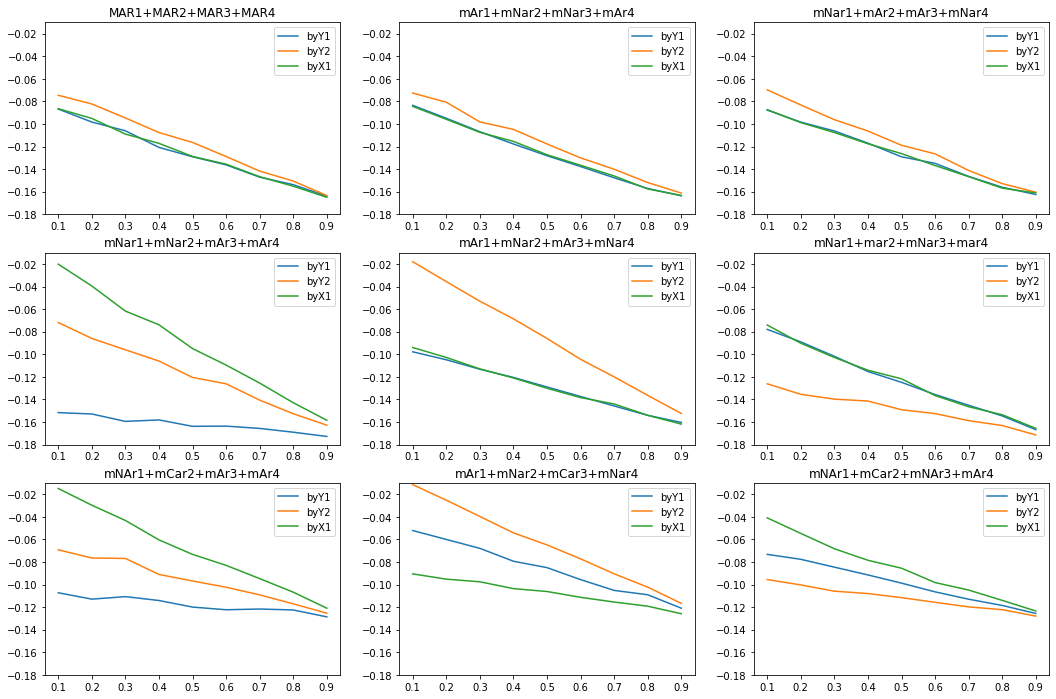

In [45]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(6 * 3,4 * 3))
[ax.set_ylim([-0.18, -0.01]) for ax in axes.flatten()]

MAR4_fewPatterns.plot(ax = axes[0,0], title = "MAR1+MAR2+MAR3+MAR4")
MAR_MNAR1_fewPatterns.plot(ax = axes[0,1], title = "mAr1+mNar2+mNar3+mAr4")
MAR_MNAR4_fewPatterns.plot(ax = axes[0,2], title = "mNar1+mAr2+mAr3+mNar4")

MAR_MNAR2_fewPatterns.plot(ax = axes[1,0], title = "mNar1+mNar2+mAr3+mAr4")
MAR_MNAR3_fewPatterns.plot(ax = axes[1,1], title = "mAr1+mNar2+mAr3+mNar4")
MAR_MNAR5_fewPatterns.plot(ax = axes[1,2], title = "mNar1+mar2+mNar3+mar4")

MCAR_MAR_MNAR2_fewPatterns.plot(ax = axes[2,0], title = "mNAr1+mCar2+mAr3+mAr4")
MCAR_MAR_MNAR1_fewPatterns.plot(ax = axes[2,1], title = "mAr1+mNar2+mCar3+mNar4")
MCAR_MAR_MNAR3_fewPatterns.plot(ax = axes[2,2], title = "mNAr1+mCar2+mNAr3+mAr4")

1ый (MAR1+MAR2+MAR3+MAR4) и 2ой (mAr1+mNar2+mNar3+mAr4) и 3ий! графики имеют одинаковую структуру, поскольку wss_MAR2+MAR3 = wss_MNAR2+MNAR3

График (1,0) (mNar1+mNar2+mAr3+mAr4) имеет аналог (mar1+mar2+mnar3+mnar4)

# Regression imputation

Random imputation of missing values in one parameter:

In [59]:
X_full = data_gener(1000, 0.4)
mean_Y1 = X_full[:,0].mean() 

#___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]
missing_columns = ['Y1', 'Y2']

ma = MultivariateAmputation(
    patterns = [ {'incomplete_vars': [0,1], 'mechanism': 'MAR'} ],
    prop = 0.2
)

X_miss = ma.fit_transform(X_full)
X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])

df = pd.DataFrame()

In [60]:
df

""


In [61]:
X_m

,Y1,Y2,X1
0,2.037296,100.128483,9998.936405
1,NaN,NaN,9999.962872
2,2.211364,99.517034,10000.315681
3,NaN,NaN,10000.634813
4,0.586514,99.023832,10000.254703
...,...,...,...
995,NaN,NaN,10002.757618
996,NaN,NaN,9999.803356
997,0.236626,100.921964,9999.652174
998,1.535172,99.137620,10000.025292


In [3]:
def random_imputation(df, feature):
    
    df[feature + '_imp'] = df[feature]
    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

Random imp for all mis values:

In [63]:
for feature in missing_columns:
    df = random_imputation(X_m, feature)

In [64]:
mean_Y1

1.0045502076013477

In [65]:
df

,Y1,Y2,X1,Y1_imp,Y2_imp
0,2.037296,100.128483,9998.936405,2.037296,100.128483
1,NaN,NaN,9999.962872,1.729078,100.994823
2,2.211364,99.517034,10000.315681,2.211364,99.517034
3,NaN,NaN,10000.634813,1.464431,100.642732
4,0.586514,99.023832,10000.254703,0.586514,99.023832
...,...,...,...,...,...
995,NaN,NaN,10002.757618,1.791738,100.262236
996,NaN,NaN,9999.803356,2.492222,99.499216
997,0.236626,100.921964,9999.652174,0.236626,100.921964
998,1.535172,99.137620,10000.025292,1.535172,99.137620


In [66]:
# df.isnull().sum()

In [4]:
def regr_imp(df, feature):
    for feature in missing_columns:

        parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})

        #Create a Linear Regression model to estimate the missing data
        model = linear_model.LinearRegression()
        model.fit(X = df[parameters], y = df[feature + '_imp'])

        #observe that I preserve the index of the missing data from the original dataframe
        df.loc[df[feature].isnull(), feature] = model.predict(df[parameters])[df[feature].isnull()]
    return df

In [69]:
df = regr_imp(df, feature)
df

,Y1,Y2,X1,Y1_imp,Y2_imp
0,2.037296,100.128483,9998.936405,2.037296,100.128483
1,1.209181,100.075297,9999.962872,1.729078,100.994823
2,2.211364,99.517034,10000.315681,2.211364,99.517034
3,1.273944,100.160600,10000.634813,1.464431,100.642732
4,0.586514,99.023832,10000.254703,0.586514,99.023832
...,...,...,...,...,...
995,1.651296,100.729348,10002.757618,1.791738,100.262236
996,0.821033,100.235192,9999.803356,2.492222,99.499216
997,0.236626,100.921964,9999.652174,0.236626,100.921964
998,1.535172,99.137620,10000.025292,1.535172,99.137620


In [70]:
df["Y1"].mean()

0.9785220899131686

In [71]:
df["Y1_imp"].mean()

0.961110625737022

In [7]:
def regr_func(df, missing_columns):
    
    for feature in missing_columns:
        df[feature + '_imp'] = df[feature]
        number_missing = df[feature].isnull().sum()
        observed_values = df.loc[df[feature].notnull(), feature]
        df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)


    for feature in missing_columns:

            parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})

            #Create a Linear Regression model to estimate the missing data
            model = linear_model.LinearRegression()
            model.fit(X = df[parameters], y = df[feature + '_imp'])

            #observe that I preserve the index of the missing data from the original dataframe
            df.loc[df[feature].isnull(), feature] = model.predict(df[parameters])[df[feature].isnull()]

    return df

In [8]:
def linregr_imp(param, num, propor, mech):

    corrs = np.arange(0.1, 1, 0.1)
    df_bias = pd.DataFrame(columns = ['full', mech+str(1), mech+str(2), mech+str(3), mech+str(4)])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_M1', 'mean_M2', 'mean_M3', 'mean_M4'])

        for n in np.arange(100):

            X_full = data_gener(1000, cor)
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean() 


            #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]
            missing_columns = ["Y1", "Y2"]
            
            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0,1], 'mechanism': mech} ],
                prop = propor
            )
            
            X_miss = ma.fit_transform(X_full)
            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
 

            imp = regr_func(X_m, missing_columns)
            df_means.loc[n, 'mean_M1'] = imp[param].mean()
            
            
            #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]
            missing_columns = ["Y1"]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0], 'mechanism': mech} ],
                prop = propor
            )
            
            X_miss = ma.fit_transform(X_full)
            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])
            
            
            
            for feature in missing_columns:
                df = random_imputation(X_m, feature)

                
            imp = regr_func(X_m, missing_columns)
            df_means.loc[n, 'mean_M2'] = imp[param].mean()



            #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]
            missing_columns = ["Y2", "X1"]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [1,2], 'mechanism': mech} ],
                prop = propor
            )
            
            X_miss = ma.fit_transform(X_full)
            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])

            
            
            for feature in missing_columns:
                df = random_imputation(X_m, feature)

                
            imp = regr_func(X_m, missing_columns)
            df_means.loc[n, 'mean_M3'] = imp[param].mean()



            
            #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]
            missing_columns = ["X1"]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)
            X_m = pd.DataFrame(X_miss, columns = ['Y1','Y2','X1'])

            
            for feature in missing_columns:
                df = random_imputation(X_m, feature)

                
            imp = regr_func(X_m, missing_columns)
            df_means.loc[n, 'mean_M4'] = imp[param].mean()


        df_bias.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias.loc[cor, mech+str(1)] = df_means['mean_M1'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(2)] = df_means['mean_M2'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(3)] = df_means['mean_M3'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(4)] = df_means['mean_M4'].mean() - df_means['mean_full'].mean()

    return df_bias

In [9]:
regr_MAR_Y1 = linregr_imp(param = "Y1", num = 0, propor = 0.2, mech = "MAR")
regr_MAR_Y2 = linregr_imp(param = "Y2", num = 1, propor = 0.2, mech = "MAR")
regr_MAR_X1 = linregr_imp(param = "X1", num = 2, propor = 0.2, mech = "MAR")
regr_MNAR_Y1 = linregr_imp(param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
regr_MNAR_Y2 = linregr_imp(param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
regr_MNAR_X1 = linregr_imp(param = "X1", num = 2, propor = 0.2, mech = "MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

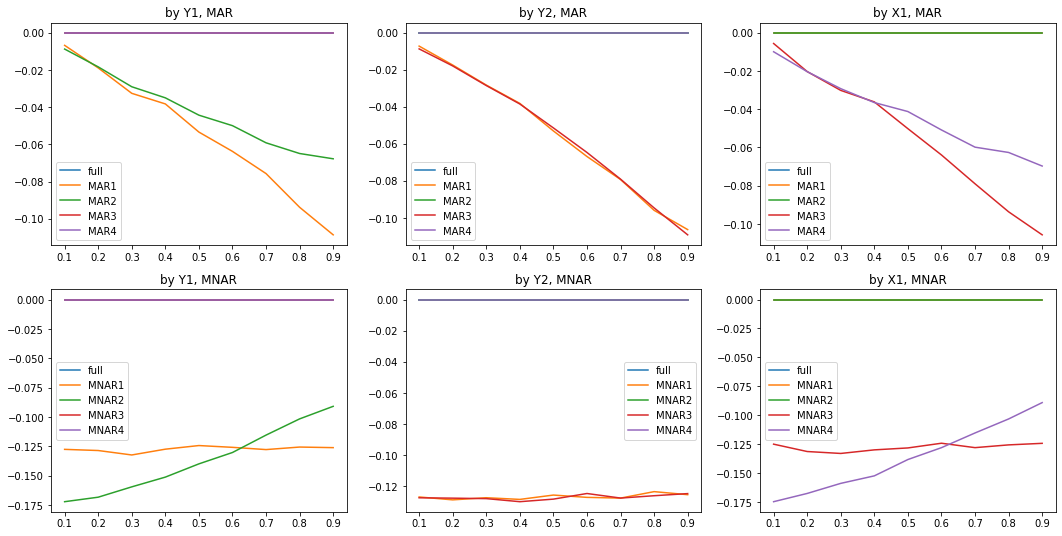

In [10]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))

regr_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
regr_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
regr_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
regr_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
regr_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
regr_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

# MICE imputation

In [19]:
def mice_imp(param, num, propor, mech):

    corrs = np.arange(0.1, 1, 0.1)

    df_bias = pd.DataFrame(columns = ['full', mech+str(1), mech+str(2), mech+str(3), mech+str(4)])

    for cor in corrs:

        n = 0
        df_means = pd.DataFrame(columns = ['mean_full', 'mean_M1', 'mean_M2', 'mean_M3', 'mean_M4'])

        for n in np.arange(100):

            X_full = data_gener(1000, cor)
            df_means.loc[n, 'mean_full'] = X_full[:,num].mean() 


            #___MAR1________'incomplete_vars': [0,1], 'weights': [0,0,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0,1], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)
            
            imp = IterativeImputer(max_iter=50, random_state = 0, estimator = BayesianRidge()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M1'] = imp[:,num].mean()


            
            #___MAR2________'incomplete_vars': [0], 'weights': [0,1,1]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [0], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(max_iter=50, random_state = 0, estimator = BayesianRidge()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M2'] = imp[:,num].mean()




            #___MAR3________'incomplete_vars': [1,2], 'weights': [1,0,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [1,2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(max_iter=50, random_state = 0, estimator = BayesianRidge()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M3'] = imp[:,num].mean()



            
            #___MAR4________'incomplete_vars': [2], 'weights': [1,1,0]

            ma = MultivariateAmputation(
                patterns = [ {'incomplete_vars': [2], 'mechanism': mech} ],
                prop = propor
            )
            X_miss = ma.fit_transform(X_full)

            imp = IterativeImputer(max_iter=50, random_state = 0, estimator = BayesianRidge()).fit_transform(X_miss)
            df_means.loc[n, 'mean_M4'] = imp[:,num].mean()


        df_bias.loc[cor, 'full'] = df_means['mean_full'].mean() - df_means['mean_full'].mean() 
        df_bias.loc[cor, mech+str(1)] = df_means['mean_M1'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(2)] = df_means['mean_M2'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(3)] = df_means['mean_M3'].mean() - df_means['mean_full'].mean()
        df_bias.loc[cor, mech+str(4)] = df_means['mean_M4'].mean() - df_means['mean_full'].mean()

    return df_bias

In [20]:
mice_MAR_Y1 = mice_imp(param = "Y1", num = 0, propor = 0.2, mech = "MAR")
mice_MAR_Y2 = mice_imp(param = "Y2", num = 1, propor = 0.2, mech = "MAR")
mice_MAR_X1 = mice_imp(param = "X1", num = 2, propor = 0.2, mech = "MAR")
mice_MNAR_Y1 = mice_imp(param = "Y1", num = 0, propor = 0.2, mech = "MNAR")
mice_MNAR_Y2 = mice_imp(param = "Y2", num = 1, propor = 0.2, mech = "MNAR")
mice_MNAR_X1 = mice_imp(param = "X1", num = 2, propor = 0.2, mech = "MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

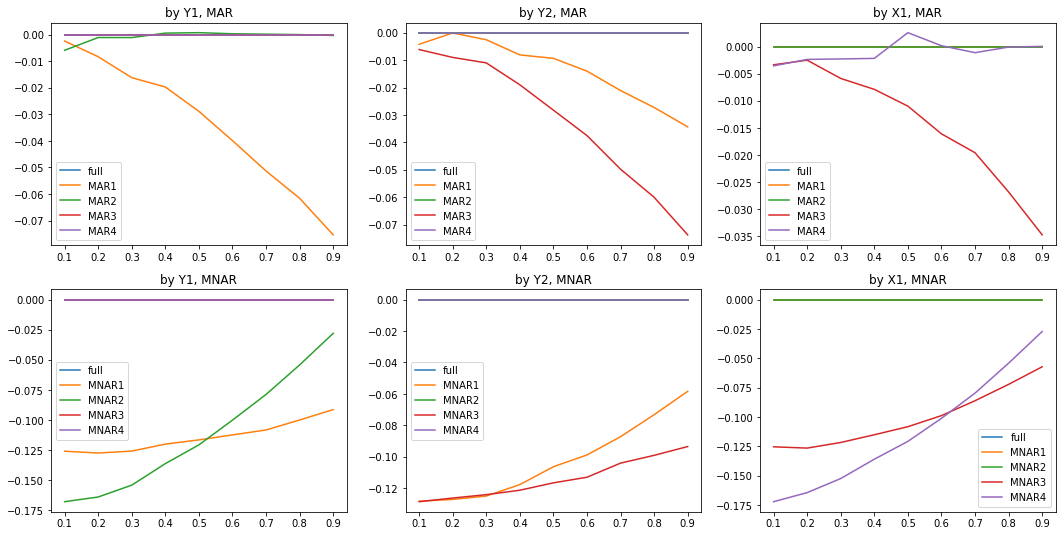

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))

mice_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
#plt.xlabel("miss proportion")
#plt.ylabel("bias")
mice_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mice_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mice_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mice_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mice_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

<AxesSubplot:title={'center':'by X1, MNAR'}>

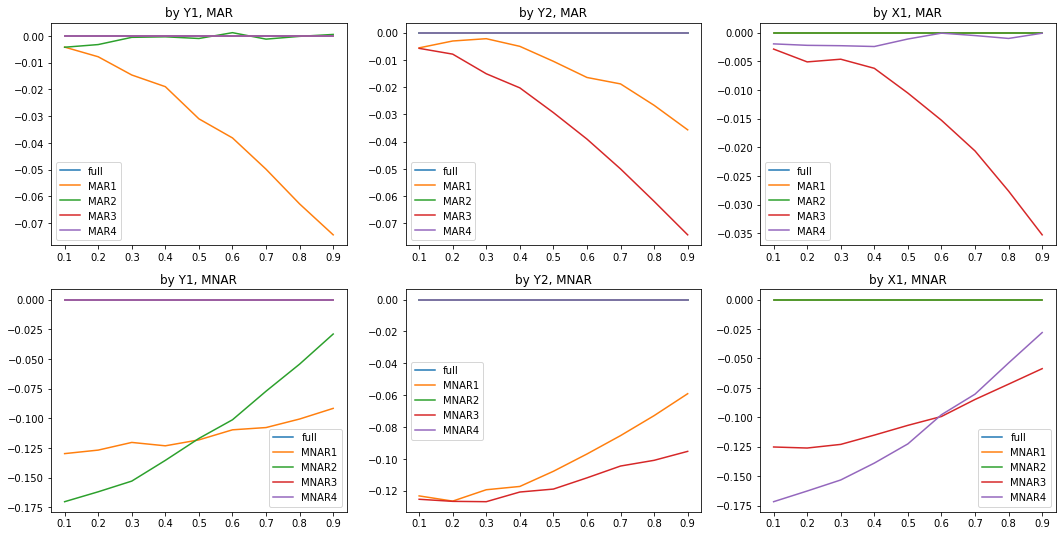

In [112]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize=(6*3,3 * 3))

mice_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, MAR")
#plt.xlabel("miss proportion")
#plt.ylabel("bias")
mice_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, MNAR")
mice_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, MAR")
mice_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, MNAR")
mice_MAR_X1.plot(ax = axes[0,2], title = "by X1, MAR")
mice_MNAR_X1.plot(ax = axes[1,2], title = "by X1, MNAR")

- On chart 1.1 mice shows good results in case MAR2, cause only one parametr has missing values;
Worse situation with MAR1, here we have 2/3 missing value, so with increasing prop it becomes harder to predict the missing values (but still small bias value).

- Not clear why on chart 1.2 plots of MAR1 and MAR3 have different appearance. Both of it has one mis values (Y1 or X1).

# Comparison

<AxesSubplot:title={'center':'by X1, mice'}>

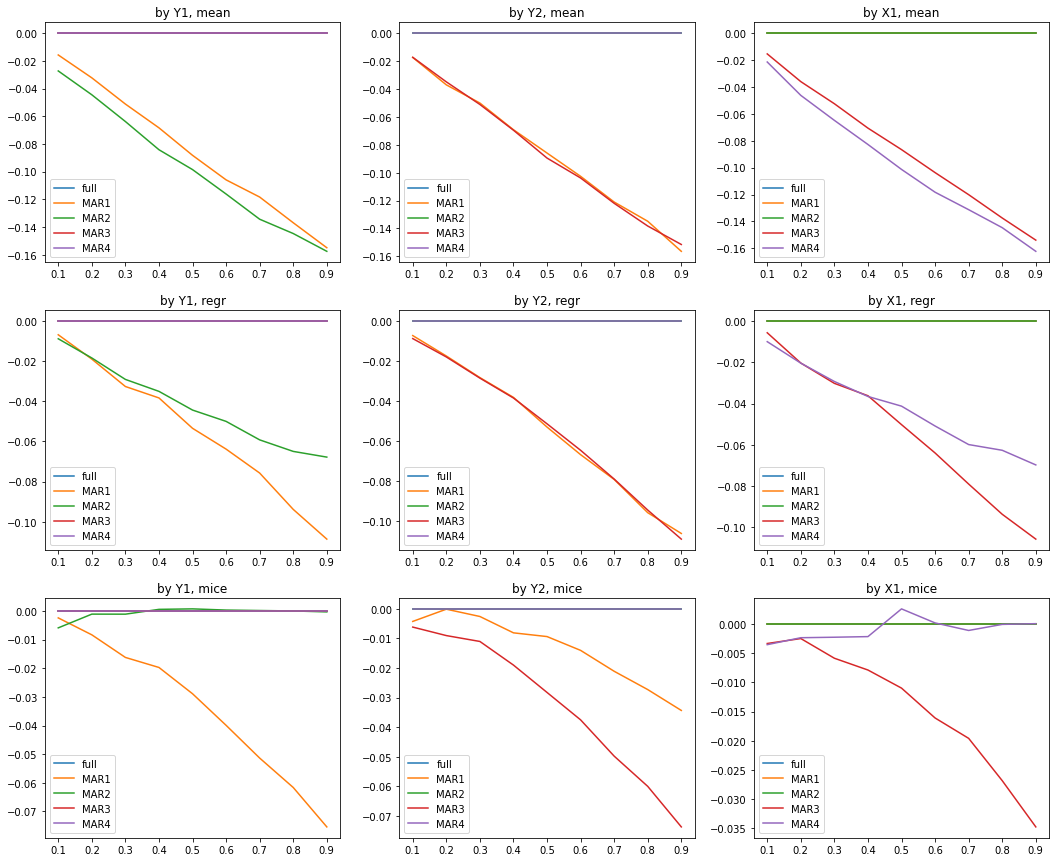

In [27]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(6*3,5 * 3))

meanNA_MAR_Y1.plot(ax = axes[0,0], title = "by Y1, mean")
meanNA_MAR_Y2.plot(ax = axes[0,1], title = "by Y2, mean")
meanNA_MAR_X1.plot(ax = axes[0,2], title = "by X1, mean")

regr_MAR_Y1.plot(ax = axes[1,0], title = "by Y1, regr")
regr_MAR_Y2.plot(ax = axes[1,1], title = "by Y2, regr")
regr_MAR_X1.plot(ax = axes[1,2], title = "by X1, regr")

mice_MAR_Y1.plot(ax = axes[2,0], title = "by Y1, mice")
mice_MAR_Y2.plot(ax = axes[2,1], title = "by Y2, mice")
mice_MAR_X1.plot(ax = axes[2,2], title = "by X1, mice")

<AxesSubplot:title={'center':'by X1, mice'}>

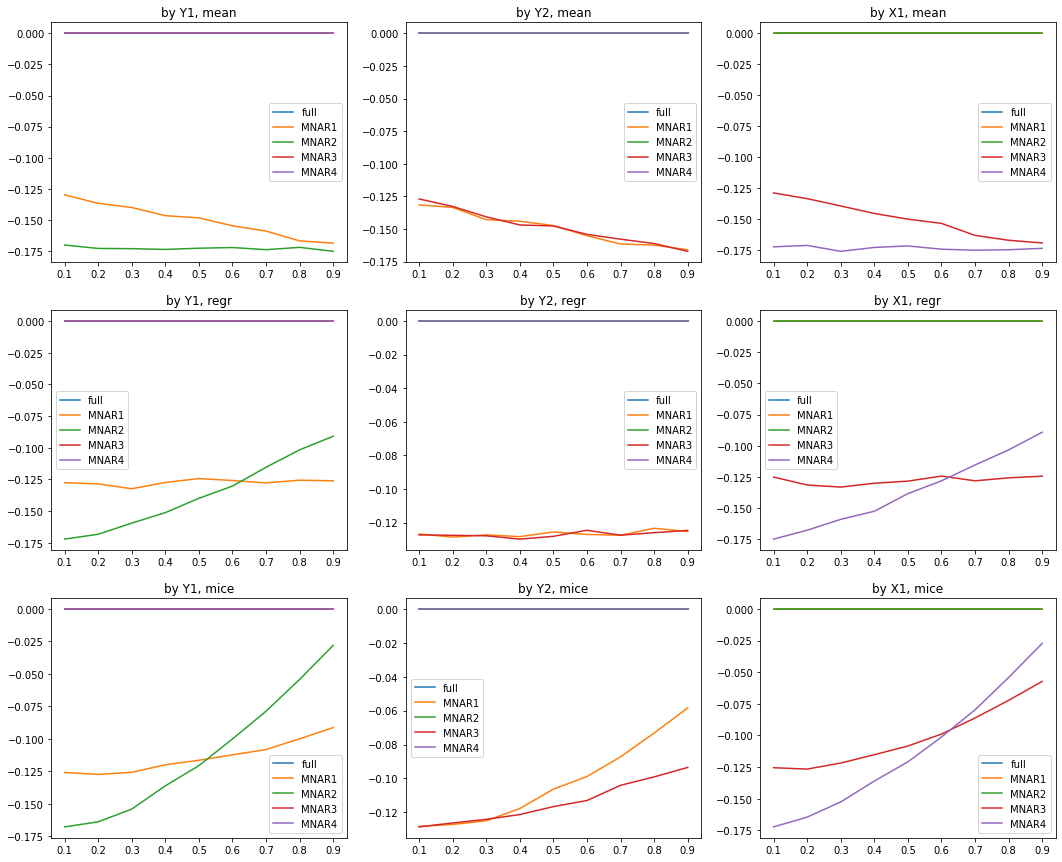

In [28]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(6*3,5 * 3))

meanNA_MNAR_Y1.plot(ax = axes[0,0], title = "by Y1, mean")
meanNA_MNAR_Y2.plot(ax = axes[0,1], title = "by Y2, mean")
meanNA_MNAR_X1.plot(ax = axes[0,2], title = "by X1, mean")

regr_MNAR_Y1.plot(ax = axes[1,0], title = "by Y1, regr")
regr_MNAR_Y2.plot(ax = axes[1,1], title = "by Y2, regr")
regr_MNAR_X1.plot(ax = axes[1,2], title = "by X1, regr")

mice_MNAR_Y1.plot(ax = axes[2,0], title = "by Y1, mice")
mice_MNAR_Y2.plot(ax = axes[2,1], title = "by Y2, mice")
mice_MNAR_X1.plot(ax = axes[2,2], title = "by X1, mice")